In [1]:
from qiskit import QuantumCircuit, transpile, IBMQ
from qiskit.visualization import plot_gate_map

In [2]:
provider = IBMQ.load_account()
provider.backends()

/tmp/ipykernel_78349/3170193094.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
/tmp/ipykernel_78349/3170193094.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

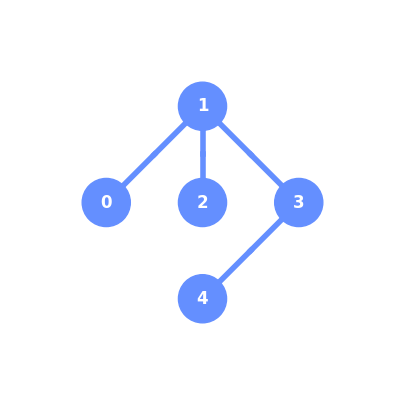

In [3]:
#Choisir un backend
backend = provider.get_backend("ibmq_lima")
plot_gate_map(backend)

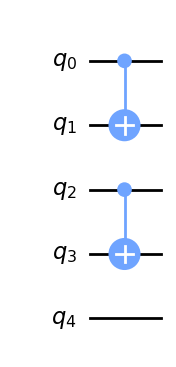

In [4]:
#Création d'un circuit
circ = QuantumCircuit(5)
circ.cx(0, 1)
circ.cx(2, 3)
circ.draw('mpl')

In [5]:
#One to one mapping
layout = {}
for i, qubit in enumerate(circ.qubits):
    layout[i] = qubit

print(layout)

{0: Qubit(QuantumRegister(5, 'q'), 0), 1: Qubit(QuantumRegister(5, 'q'), 1), 2: Qubit(QuantumRegister(5, 'q'), 2), 3: Qubit(QuantumRegister(5, 'q'), 3), 4: Qubit(QuantumRegister(5, 'q'), 4)}


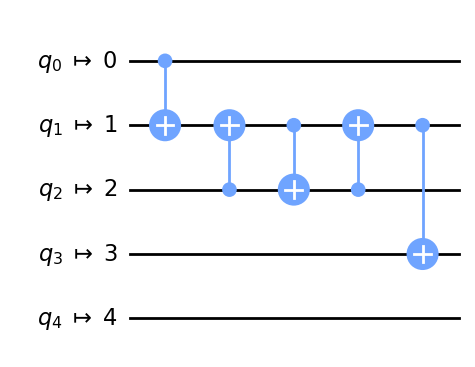

In [6]:
#Transpile avec le one to one mapping, un swap doit être insérer pour cx(2, 3)
transpiled_circuit = transpile(circ, backend, initial_layout=layout)
transpiled_circuit.draw('mpl')

In [9]:
#Création du layout optimal
layout[circ.qubits[2]] = 3
layout[circ.qubits[3]] = 4
layout[circ.qubits[4]] = 2
print(layout)

{0: Qubit(QuantumRegister(5, 'q'), 0), 1: Qubit(QuantumRegister(5, 'q'), 1), 2: Qubit(QuantumRegister(5, 'q'), 2), 3: Qubit(QuantumRegister(5, 'q'), 3), 4: Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 2): 3, Qubit(QuantumRegister(5, 'q'), 3): 4, Qubit(QuantumRegister(5, 'q'), 4): 2}


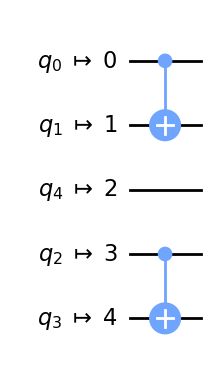

In [8]:
#Transpile avec le layout optimal, pas de swap nécessaire
transpiled_circuit = transpile(circ, backend, initial_layout=layout)
transpiled_circuit.draw('mpl')